# 8. Support Vector Machies y regresión lineal

En este caso, se utiliza un algoritmo de aprendizaje supervisado, no hacemos una predicción de un valor concreto, sino una clasificación y regresión.

Se parte de los datos analizados, normalizados y acotados 
logrados en el punto 0, para el training.

SVM consiste básicamente en entrenar un modelo para etiquetar clases en los datos, para después, dada una muestra, definir a que clase pertenece.


Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [31]:
#Librerías a usar

import numpy as np
import pandas
from scipy.stats import skew
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error



In [15]:

#Importación de datos
df_train = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 
df_test = pd.read_csv("data/PreciosCasas/test.csv") 

# print a summary of the data in Melbourne data
df_train.describe()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,728.805765,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,421.402158,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
#Vamos a ver que variables elegimos: todas como columnas y el SalesPrice como target

X_train = df_train.ix[:, df_train.columns != 'Unnamed: 0']
X_train= X_train.ix[:, X_train.columns != 'SalePrice']
X_train= X_train.ix[:, X_train.columns != 'Id']

print (X_train.head())

y = df_train['SalePrice']



   MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
0         706           0        150          856          ...             
1         978           0        284         1262          ...             
2         486           0        434          920          ...             
3         216           0        540          756          ...             
4         655           0        490         1145          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0 

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Se hace el modelo de regresión lineal

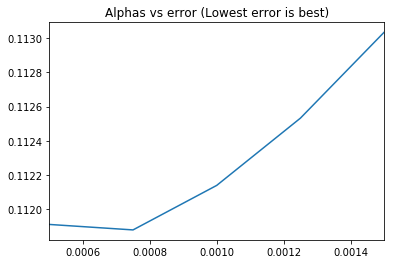

In [19]:
alphas = [0.0005, 0.00075, 0.001, 0.00125, 0.0015]
scores = [
     np.sqrt(-cross_val_score(ElasticNet(alpha), X_train, y, scoring="neg_mean_squared_error", cv=5)).mean()
     for alpha in alphas
]
scores = pandas.Series(scores, index=alphas)
scores.plot(title = "Alphas vs error (Lowest error is best)")

## Modelo SVM

Esta es la parte interesante. Vamos a usar la función GridSearchCV de sklearn

Para ser capaces de ir validando el modelo, lo separaremos en dos grupos, predictors and target. Lo haremos mediando un split con un número generaro aleatorio. Como queremos que todas las veces que ejecutemos el modelo nos salga lo mismo, estableceremos el argumento de random_state.


In [25]:
from sklearn.model_selection import train_test_split


#Separamos los datos en dos grupos, 
train_X, val_X, train_y, val_y = train_test_split(X_train, y,random_state = 0)


In [26]:
gsc = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid={
        'C': range(1, 4),
        'epsilon': (0.03, 0.04, 0.05, 0.06, 0.07),
    },
    cv=5
)
grid_result = gsc.fit(train_X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.001056 using {'C': 1, 'epsilon': 0.03}


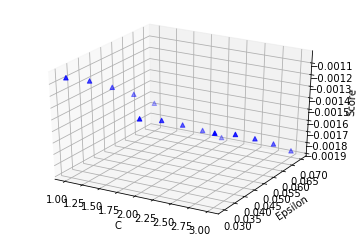

In [27]:
# Veamos la relación entre los parámetros del SVM 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([row['C'] for row in grid_result.cv_results_['params']],
           [row['epsilon'] for row in grid_result.cv_results_['params']],
           grid_result.cv_results_['mean_test_score'],
           c='b', marker='^')

ax.set_xlabel('C')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Score')

entrenando el modelo con los parámetros encontrados antes

In [29]:
linear_model = ElasticNet(alpha=0.001)
linear_model.fit(train_X, train_y)

svr_model = SVR(kernel='rbf', C=2, epsilon=0.05)
svr_model.fit(train_X, train_y)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicción



y en este caso el error es: 
0.313150849886


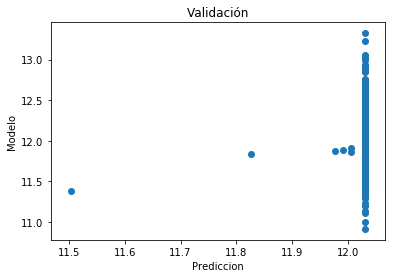

In [32]:
#Error cometido en esta medicion MAE 
prediccion = svr_model.predict(val_X)
print("y en este caso el error es: ")
print (mean_absolute_error(val_y,prediccion ))

# Veamoslo en un scatter plot
plt.scatter(prediccion, val_y );
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

y en este caso el error es: 
0.0740392006132


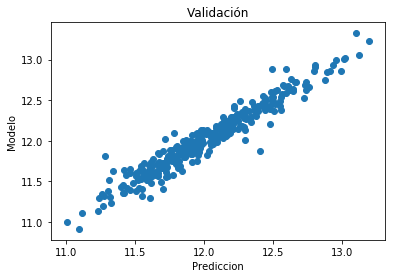

In [34]:
#Error cometido en esta medicion MAE 
prediccion = linear_model.predict(val_X)
print("y en este caso el error es: ")
print (mean_absolute_error(val_y,prediccion ))

# Veamoslo en un scatter plot
plt.scatter(prediccion, val_y );
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()